## [1] Age and Gender Prediction From Face Images Using Attentional Convolutional Network
<img src="images/[1]Attentional Convolutional Network.png"> <br>
Document is available at: https://arxiv.org/pdf/2010.03791.pdf

First we need to import used libraries:

In [2]:
import tensorflow as tf, pandas as pd, matplotlib.pyplot as plt, numpy as np, os
from keras.utils import plot_model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from helper.reference_1.ResidualAttentionNetwork import ResidualAttentionNetwork
from helper.prepare_data import prepare_data

First, we pick the dataset that we would like to use from:
<br>1 - Age, gender, ethnicity CSV
<br>2 - UTKFace
<br>3 - Fairface

In [3]:
choice = 3

Prepare data from each dataset so that we end up with normalized pixels and labels:

In [4]:
x, y_age, y_gender, y_ethnicity, img_size = prepare_data(choice = choice)

Display some exemplary images:

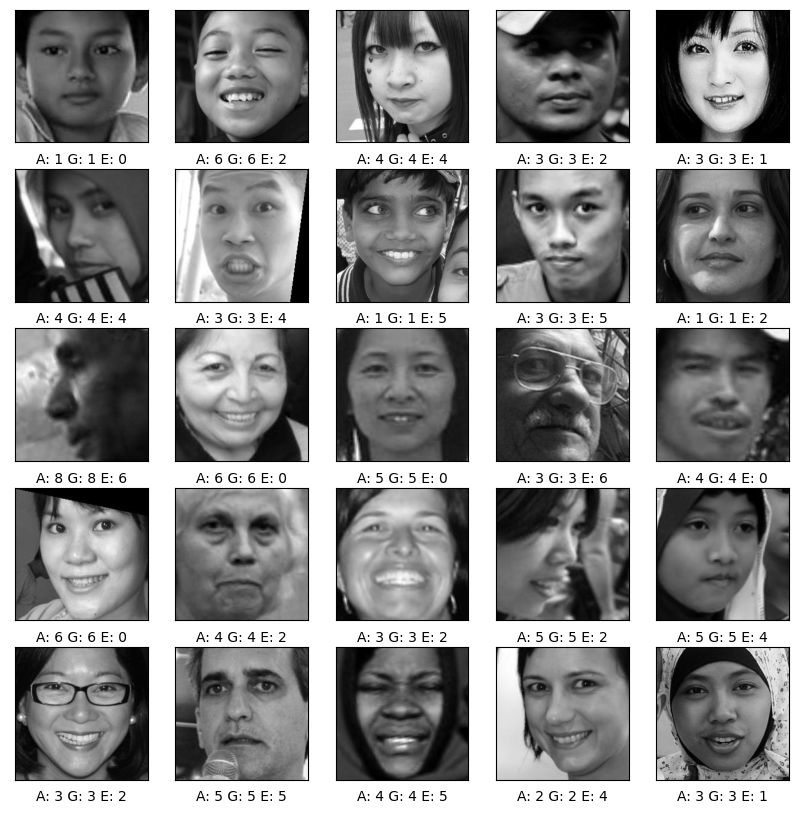

In [5]:
# size of the whole grid of images
plt.figure(figsize=(10, 10))

# display first 25 images in a 5x5 grid
for i in range(0, 25):
    plt.subplot(5, 5, (i % 25) + 1)
    plt.grid(False)
    #disable x and y axis description
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i].reshape(img_size, img_size), cmap='gray')
    # A = age, G = gender, E = ethnicity
    plt.xlabel("A: "+ str(y_age[i]) + " G: " + str(y_gender[i]) + (" E: " + str(y_ethnicity[i]) if y_ethnicity.size > 0 else ""))
plt.show()

Build the model:

In [6]:
# https://github.com/deontaepharr/Residual-Attention-Network
model = ResidualAttentionNetwork((img_size, img_size, 1), 1, activation='sigmoid').build_model()
model.compile(optimizer = Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 112, 112, 32  0           ['conv2d[0][0]']                 
                                )                                                             

c:\Python\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 activation_27 (Activation)     (None, 14, 14, 128)  0           ['batch_normalization_27[0][0]'] 
                                                                                                  
 conv2d_29 (Conv2D)             (None, 14, 14, 32)   4128        ['activation_27[0][0]']          
                                                                                                  
 batch_normalization_28 (BatchN  (None, 14, 14, 32)  128         ['conv2d_29[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_28 (Activation)     (None, 14, 14, 32)   0           ['batch_normalization_28[0][0]'] 
                                                                                                  
 conv2d_30 (Conv2D)             (None, 14, 14, 64)   18496       ['activation_28[0][0]']          
          

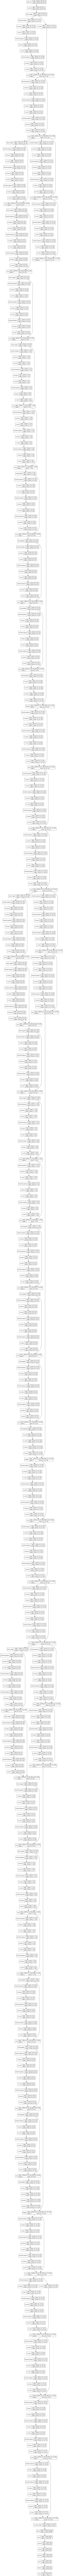

In [7]:
plot_model(model, to_file = os.getcwd() + '//images//[1]_model.png', show_shapes = True, show_dtype = False, show_layer_names = False, rankdir = 'TB', expand_nested = False, dpi = 96)

Training and validation:

In [8]:
# we might use validation_split or we can divide sets as before which allows for reproducibility, but 3rd dataset is a bit messy in this matter
# seed = 100
# x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size = 0.2, random_state = seed)
# x_train_ethnicity, x_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(x, y_ethnicity, test_size = 0.2, random_state = seed)

history = model.fit(x, y_age , epochs = 10, validation_split = 0.05)

Epoch 1/10
  1/326 [..............................] - ETA: 12:50:31 - loss: 32.7797 - accuracy: 0.0000e+00

In [ ]:
age_acc = np.array(history.history['age_out_accuracy'])
age_val_acc = np.array(history.history['val_age_out_accuracy'])
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Accuracy')
plt.plot(epochs, age_val_acc, 'r', label='Validation Accuracy')
plt.title('Age Accuracy Graph')
plt.legend()

In [ ]:
gender_acc = np.array(history.history['gender_out_accuracy'])
gender_val_acc = np.array(history.history['val_gender_out_accuracy'])
epochs = range(len(gender_acc))

plt.plot(epochs, gender_acc, 'b', label='Training Accuracy')
plt.plot(epochs, gender_val_acc, 'r', label='Validation Accuracy')
plt.title('Gender Accuracy Graph')
plt.legend()